C:\Users\24958\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


add green2
add green4
delete green  2
add green4
add green6
add red2
add red4
add red6
add red8
add red10
add green8
add green10


C:\Users\24958\AppData\Local\Temp\ipykernel_28696\2985435968.py:135: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  ndimage.measurements.center_of_mass(
C:\Users\24958\AppData\Local\Temp\ipykernel_28696\2985435968.py:177: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  ndimage.measurements.center_of_mass(


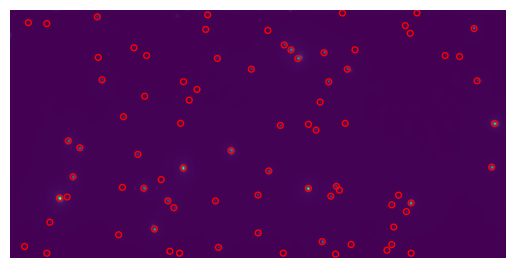

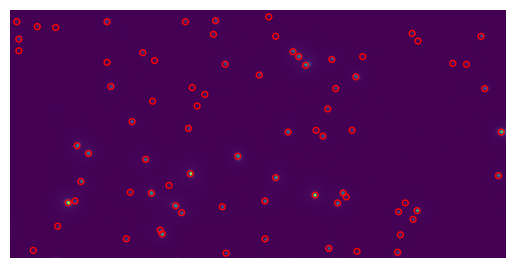

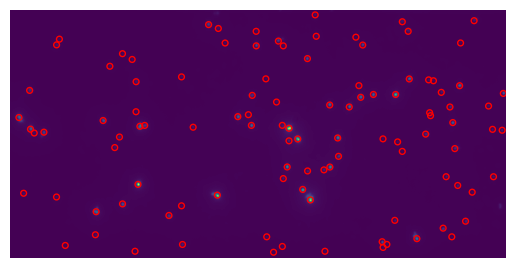

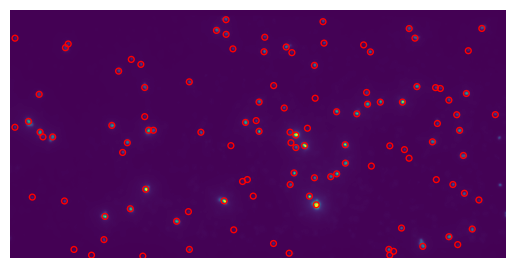

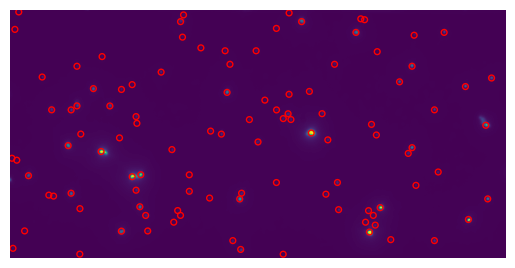

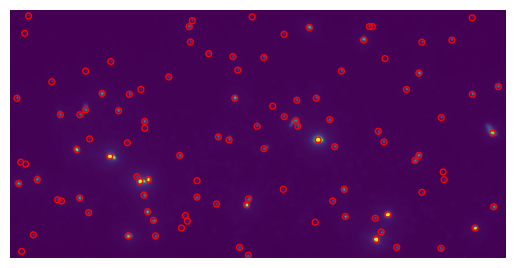

Mean squared displacement after G to R transformation: 0.930058803213698
Mean squared displacement after inverse (R to G) transformation: 0.9098207100400787
Mean squared displacement before transformation: 103.79266336737662


In [1]:


# importing the modules
import os
import cv2
import tkinter as tk
import tkinter.filedialog as fd
import tkinter.messagebox as mb
from PIL import Image
from skimage import transform, img_as_int, exposure
from skimage.feature import blob_log, blob_doh, blob_dog
import skimage.io as io
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, spatial
from scipy.optimize import curve_fit
from cmath import inf
import sys
import Polywarp

def find_max (x,y, arr):
    max_elem = -1
    for i in range(x-10, x+11):
        for j in range(y-10, y+11):
            if arr[j][i] > max_elem:
                max_elem =  arr[j][i]

    list_index_max =[(i,j) for i in range(x-20, x+21)  for j in range(y-20, y+21) if arr[j][i]  == max_elem]
    line, column = list_index_max[0]
    return(line, column)
# https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/  
# function to display the coordinates of  of the points clicked on the image


# def click_event(event, x, y, flags, params):
#     global counter
#     global green_coord
#     global red_coord
#     if event == cv2.EVENT_LBUTTONDOWN:   # checking for left mouse clicks
        
        
#         print(x,y)   
#         x_max,y_max = find_max(x,y,image_array)
#         print(x_max, y_max)
#         if counter % 2 != 0: 
#             red_coord.append(x_max) 
#             red_coord.append(y_max-256)
#             counter = counter + 1
#             print (counter)
#         else:
#             green_coord.append(x_max) 
#             green_coord.append(y_max)
#             counter = counter + 1
#         cv2.circle(better_contrast_img, (x_max, y_max), 4, (0, 0, 127), 2)
#     if event==cv2.EVENT_RBUTTONDOWN:
#         counter = 0
#         green_coord.clear()
#         red_coord.clear()
        
def click_event(event, x, y, flags, params):
    global counter
    global green_coord
    global red_coord
    global green
    global red
    global previous_green
    global previous_red
    global previous_x
    global previous_y
    if event == cv2.EVENT_LBUTTONDOWN:   # checking for left mouse clicks
        x_max,y_max = find_max(x,y,image_array)
        previous_x = x_max
        previous_y = y_max
        if y_max >= 256:
                red_coord.append(x_max) 
                red_coord.append(y_max-256)
                counter = counter + 1
                print ("add red"+str(len(red_coord)))
                previous_green = green
                red +=1
        if y_max <= 256:
                green_coord.append(x_max) 
                green_coord.append(y_max)
                print("add green"+str(len(green_coord)))
                counter = counter + 1
                previous_red = red
                green +=1
        cv2.circle(better_contrast_img, (x_max, y_max), 4, (0, 0, 127), 2)
    if event==cv2.EVENT_RBUTTONDOWN:
        counter -= 1
        if green > previous_green:
            green_coord.pop()
            green_coord.pop()
            print("delete green  "+str(len(green_coord)))
        if red > previous_red:
            red_coord.pop()
            red_coord.pop()
            print("delete red  "+str(len(red_coord)))
        cv2.circle(better_contrast_img, (previous_x, previous_y), 4, (255, 0, 0), 2)
        

        
        
def blob_detection(img, min_sigma, max_sigma, threshold, method=0):
    """This function is mostly used for detecting the beads in any image.

    Args:
        img_path (string): The absolute path of the input image.
        min_sigma (int): The minimum sigma, lower it is, smaller the blob will be detected.
        max_sigma (int): The maximum sigma, higher it is, bigger the blob will be detected.
        threshold (float): Higher it is, higher the intensities of blobs.
        method (int, optional): 0 for Difference of Gaussian (DoG) and 1 for Determinant of Hessian (DoH). 
        They should be applied with different combination of parameters. DoG is more suitable for fret movies,
        while DoH is more suitable for sequencing images. Defaults to 0.

    Returns:
        centers: A numpy array containing the coordinates of all the centers.
    """
    #img = io.imread(img_path)
    if method == 0:
        blob = blob_dog(
            img, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold
        )
    else:
        blob = blob_doh(
            img, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold
        )
    i = 0
    # r = 3
    centers = []
    h, w = img.shape
    for blob in blob:
        y, x, r = blob
        if y > r and y < (h - r) and x > r and x < (w - r):
            centers.append(
                ndimage.measurements.center_of_mass(
                    img[int(y - r) : int(y + r + 1), int(x - r) : int(x + r + 1)]
                )
            )
            centers[i] = list(np.add(centers[i], [x - r, y - r]))
            i += 1
    
    return np.array(centers)
 



def show_blob_detection_res(img, min_sigma, max_sigma, threshold, method=0):
    """
    Showing the result of 'blob detection' function. Used as the same way of 'blob_detection'
    """
    fig, ax = plt.subplots()
    #img = io.imread(img_path)
    ax.imshow(img)
    if method == 0:
        res = blob_dog(
            img,
            min_sigma=min_sigma,
            max_sigma=max_sigma,
            threshold=threshold,
        )
    else:
        res = blob_doh(
            img,
            min_sigma=min_sigma,
            max_sigma=max_sigma,
            threshold=threshold,
        )
    i = 0
    CM = []
    r = 3
    [h, w] = img.shape
    for blob in res:
        y, x, r = blob
        # print(r)
        if y > r and y < (h - r) and x > r and x < (w - r):
            CM.append(
                ndimage.measurements.center_of_mass(
                    img[int(y - r) : int(y + r), int(x - r) : int(x + r)]
                )
            )
            CM[i] = list(np.add(CM[i], [y - r, x - r]))
            x1, y1 = CM[i]
            c = plt.Circle([y1, x1], 3, color="red", linewidth=1, fill=False)
            ax.add_patch(c)
            i += 1
    ax.set_axis_off()
    plt.show()

def count_nearest_pts(src, dst, radius):
    """Counting the number of nearest neighbors for each given point.

    Args:
        src (numpy array): (N, 2) shape array. Build the kd tree based on this.
        dst (numpy array): (N, 2) shape array. For each point in this array, find the nearest neighbors in src array.
        radius (int): The maximum searching radius.

    Returns:
        res, idx: res is the distance for the point and its neighbor, 'inf' means no neighbor in given search radius. 
        idx is the index for the neighbor in src array.
    """
    tree = spatial.KDTree(src)
    res, idx = tree.query(dst, k=1, distance_upper_bound=radius)
    for i in range(0, len(idx)):
        if len(np.argwhere(idx == idx[i])) > 1:
            res[i] = inf
    return res, idx



In [7]:
root = tk.Tk()
root.attributes("-topmost", True)
root.withdraw()

path = fd.askdirectory(title = "Choose the directory containing beads movies", initialdir = "C:/Users/Anton/Documents/Jupyter home/ExampleData/Test_folder/220717_FC_Nano_200nm_Multicolor/original")

usable_green_beads = np.empty((0, 2))
usable_red_beads = np.empty((0, 2))
os.chdir(path)
green_coord = []
red_coord = []
counter = 0 
counter = 0 
green = 0
previous_green = 0
red = 0
previous_red = 0
previous_x = 0
previous_y = 0
#Loop through the tif files in directory and import the image
for current_dir,dirs, files in os.walk(path) :
    for el in files: 
        if el.split('.')[-1].lower() == 'tif':

            img = io.imread(current_dir + '/' + el) #reading the stack of images
            img1 = np.mean(img, axis = 0) #averaging by the stack
            img1 = img1.astype("ushort") #turn from float format to ushort

            image_array = np.asarray(img1)
            #print(image_array)
            v_min, v_max = np.percentile(image_array, (0.2, 99.8))
            better_contrast_image_array = exposure.rescale_intensity(image_array, in_range=(v_min, v_max))
            better_contrast_img = Image.fromarray(better_contrast_image_array)
            better_contrast_img.save(current_dir + '/'+'better_contrast'+ el[:-4]+'.png')
            better_contrast_img = cv2.imread(current_dir + '/'+'better_contrast' + el[:-4]+'.png')
            #for the first image, you manually click the corresponding beads in the channels to obtain an initial transformation
            if counter == 0:
                cv2.namedWindow('image') 
                cv2.setMouseCallback('image', click_event)
                while(1):

                    cv2.imshow('image',better_contrast_img)

                    #press Q to quit
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        if len(green_coord) == len(red_coord):
                            break
                        else:
                            print("Number of blobs selected in two channels are not equal")


            # wait for a key to be pressed to exit
            img1_green_channel_arr = img1 [0:256, 0:512]
            img1_red_channel_arr = img1 [256:512, 0:512]
            
            img1_red_channel = Image.fromarray(img1_red_channel_arr)
            img1_red_channel.save(current_dir + '/'+'red_channel'+ el[:-4]+'.png')

            
            img1_green_channel = Image.fromarray(img1_green_channel_arr)
            img1_green_channel.save(current_dir + '/'+'green_channel'+ el[:-4]+'.png')

            green_coord = np.reshape(green_coord,(int((counter+1)/2), 2))
            red_coord = np.reshape(red_coord,(int((counter+1)/2), 2))
            #here you use the above clicked coordinates for estimation
            tform = transform.estimate_transform('polynomial', src=green_coord, dst=red_coord, order=1)
            tform_inverse = transform.estimate_transform('polynomial', src=red_coord, dst=green_coord, order=1)

            cv2.destroyAllWindows()
            #now for the current movie, blob_detection function will detect all the beads and record their positions
            red_channel_centers = blob_detection(
                     img1_red_channel_arr,
                     min_sigma=1,
                     max_sigma=10,
                     threshold=0.001,
                     )
            show_blob_detection_res(
                     img1_red_channel_arr,
                     min_sigma=1,
                     max_sigma=10,
                     threshold=0.001,
                     )

            green_channel_centers = blob_detection(
                     img1_green_channel_arr,
                     min_sigma=1,
                     max_sigma=10,
                     threshold=0.004,
                     )
            show_blob_detection_res(
                     img1_green_channel_arr,
                     min_sigma=1,
                     max_sigma=10,
                     threshold=0.004,
                     )
            #I think this is using the estimate transformation on the green channel coordinates
            green_channel_centers = tform (green_channel_centers)
            #and then find the nearst neighbougher in the red channel
            res, idx = count_nearest_pts(green_channel_centers, red_channel_centers, 10)

            ind_red = np.where(res != inf)[0]
            ind_green = idx[np.where(res != inf)]

            usable_green_beads = np.append(usable_green_beads,  green_channel_centers[ind_green], axis=0 )
            usable_red_beads = np.append(usable_red_beads, red_channel_centers[ind_red], axis=0 )
#after recording the usable coordinates in two list, transfer the beads back to green channel coordinates
usable_green_beads = tform_inverse(usable_green_beads) #go back to the initial coordinates

order = 3
n_beads = usable_green_beads.shape[0]
#now you making the proper transformation :)
kx,ky = Polywarp.polywarp(usable_red_beads[:,0],usable_red_beads[:,1],usable_green_beads[:,0],usable_green_beads[:,1],degree=order)

tr = transform.PolynomialTransform()


order1 = 2*order
pidx = 0
par = np.zeros([2,int((order1+1)*(order1+2)/2)])
for j in range(order1 + 1):
    for i in range(j + 1):
        if (j-i)<=order and i<=order:
            par[0, pidx] = kx[j - i,i]
            par[1, pidx] = ky[j - i,i]
        else:
            par[0, pidx] = 0
            par[1, pidx] = 0
        pidx += 1
tr.params = par        

kx,ky = Polywarp.polywarp(usable_green_beads[:,0],usable_green_beads[:,1],usable_red_beads[:,0],usable_red_beads[:,1],degree=order)
tr_inv = transform.PolynomialTransform()


order1 = 2*order
pidx = 0
par = np.zeros([2,int((order1+1)*(order1+2)/2)])
for j in range(order1 + 1):
    for i in range(j + 1):
        if (j-i)<=order and i<=order:
            par[0, pidx] = kx[j - i,i]
            par[1, pidx] = ky[j - i,i]
        else:
            par[0, pidx] = 0
            par[1, pidx] = 0
        pidx += 1
tr_inv.params = par    


res = np.subtract(tr(usable_green_beads),usable_red_beads)
res = np.multiply(res,res)
print('Mean squared displacement after G to R transformation:',np.sum(res)/n_beads)
res = np.subtract(usable_green_beads,tr_inv(usable_red_beads))
res = np.multiply(res,res)
print('Mean squared displacement after inverse (R to G) transformation:',np.sum(res)/n_beads)
res = np.subtract(usable_green_beads,usable_red_beads)
res = np.multiply(res,res)
print('Mean squared displacement before transformation:',np.sum(res)/n_beads)

np.save('tform_result',tr.params )
np.save('tform_result_inv',tr_inv.params)



array([199.03350064, 177.27209068, 140.1267428 , 147.96787974,
        24.92850235, 197.00841592,  18.15859684])